#DCT(Diskretna kosinusna transformacija)


Matematički opisi i ilustracije Diskretne kosinusne transformacije zajedno sa idejom koja se koristi u JPEG kompresiji.

## Linearna algebra u 2D prostoru

Vektor - lista brojeva - realni koeficient u vremenskom domenu.

$$  f_0 \left[ \begin{array}{c}  1 \\ 0  \end{array} \right] + f_1 \left[ \begin{array}{c}  0 \\ 1  \end{array} \right] $$

Korišćenjem drugih koeficienata i druge baze moguće je predstaviti isti vektor.

$$  G_0 \frac{1}{\sqrt{2}} \left[ \begin{array}{c}  1 \\ 1  \end{array} \right] + 
G_1 \frac{1}{\sqrt{2}} \left[ \begin{array}{c}  1 \\ -1  \end{array} \right] $$

(sqrt(2) koristi se za normalizaciju baznih vektora)

Transformacija vektora <b>f</b> u <b>G</b> je DCT (Diskretna kosinusna transformacija). 
Transformacija orginalnog vektora $(f_0, f_1)$ u vektor visokih i niskih frekvencija $(G_0, G_1)$.


In [72]:
%matplotlib inline

import math 
import numpy as np
from math import sqrt as sqrt

import matplotlib.pyplot as plt

basis = [1/sqrt(2) * np.array([1, 1]), 1/sqrt(2) * np.array([1, -1])]

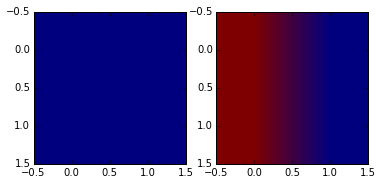

In [73]:
fig = plt.figure()

a=fig.add_subplot(121)
b0 = np.array([basis[0], basis[0]])
im = plt.imshow(b0)

a=fig.add_subplot(122)
b1 = np.array([basis[1], basis[1]])
im = plt.imshow(b1)

In [74]:
print basis[0]
print basis[1]

[ 0.70710678  0.70710678]
[ 0.70710678 -0.70710678]


### Pitanje 1

Ako je  $f_0 = 3$ i $f_1 = 5$, Koje su vrednosti sa G?


### Transformacija


$$ 
f_0 \left[ \begin{array}{c}  1 \\ 0  \end{array} \right] + f_1 \left[ \begin{array}{c}  0 \\ 1  \end{array} \right] = 
\left[ \begin{array}{c}  f_0 \\ f_1  \end{array} \right] = 
G_0 \frac{1}{\sqrt{2}} \left[ \begin{array}{c}  1 \\ 1  \end{array} \right] + 
G_1 \frac{1}{\sqrt{2}} \left[ \begin{array}{c}  1 \\ -1  \end{array} \right] =
\frac{1}{\sqrt{2}} \left[ \begin{array}{cc}  1 & 1 \\ 1 & -1  \end{array} \right] 
\left[ \begin{array}{c} G_0 \\ G_1  \end{array} \right]
$$


### 2D umesto 1D 
Ista ideja može da se primeni na 2D slike umesto na 1D vektore,
tako što se primeni 1D transformacija za svaku vrstu i kolonu slike.

Baza vektora za N=2 su vektorski proizvodi 1D baznih vektora.
Od najmanjih (0,0) do najviših (1,1) prostornih frekvencija bazni vektori-matrice su:

<matplotlib.colorbar.Colorbar instance at 0x0000000014180B48>

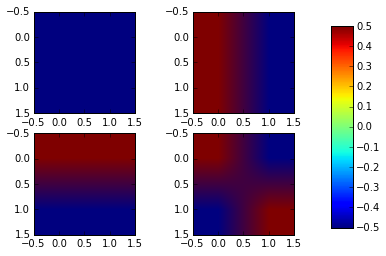

In [64]:
fig = plt.figure()

bb = np.outer(basis[0], basis[0])
a=fig.add_subplot(221)
im = plt.imshow(bb)

bb = np.outer(basis[0], basis[1])
a=fig.add_subplot(222)
im = plt.imshow(bb)

bb = np.outer(basis[1], basis[0])
a=fig.add_subplot(223)
im = plt.imshow(bb)

bb = np.outer(basis[1], basis[1])
a=fig.add_subplot(224)
im = plt.imshow(bb)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cbar_ax)

#MNIST primer

In [75]:
from sklearn.datasets import fetch_mldata
from scipy.fftpack import dct, idct

mnist = fetch_mldata('MNIST original')
print mnist.data.shape
print mnist.target.shape
print np.unique(mnist.target)

(70000L, 784L)
(70000L,)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


(784L,)


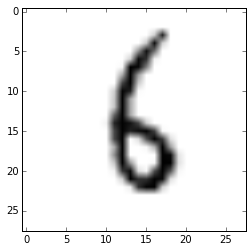

In [96]:
imgN = 4000
img = mnist.data[imgN]
print img.shape
img = img.reshape(28,28)

plt.imshow(img, cmap="Greys")


In [ ]:
print img
print mnist.target[imgN]

In [107]:
img = img/255.
imgf = dct(dct(img, axis=0), axis=1)

print imgf[0:5, 0:5]

[[  6.97867282e-07  -4.78091866e-08  -6.13407073e-07   1.01004802e-07
    4.06488231e-07]
 [ -7.10991599e-08   2.04893618e-08   4.72494928e-08  -4.31854114e-08
    6.14510789e-09]
 [ -2.78365026e-07  -1.35559762e-08   2.48418330e-07   4.78450189e-08
   -1.74245631e-07]
 [  1.55373711e-07  -4.85180558e-08  -1.06430820e-07   1.09296668e-07
   -5.66550057e-09]
 [ -1.39583863e-07   5.09732729e-08   1.14192518e-07  -1.25414069e-07
   -5.79911526e-08]]


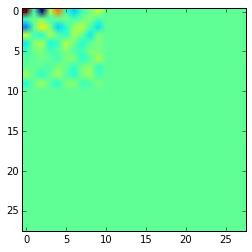

In [103]:
plt.imshow(imgf)
plt.show()

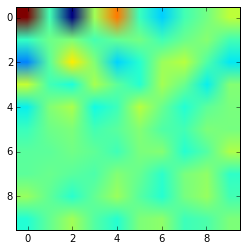

In [108]:
imgf[10:, :]=0
imgf[:, 10:]=0
plt.imshow(imgf[0:10, 0:10])
plt.show()

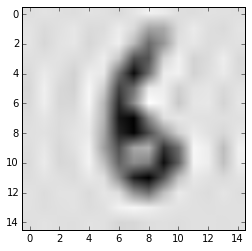

In [114]:
img = idct(idct(imgf[0:15, 0:15].T).T)

plt.imshow(img, cmap="Greys")
plt.show()

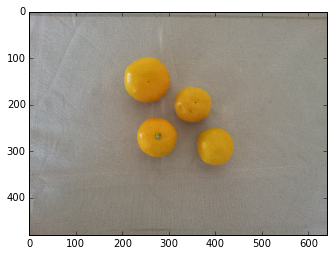

In [263]:
from skimage.io import imread
img = imread('images/20121021_160926.jpg')
plt.imshow(img)
plt.show()
(h,w, c) = img.shape

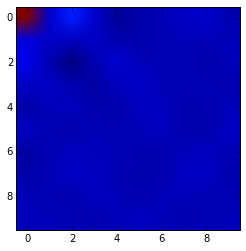

In [264]:
colorB = 2
img = img/255.
imgf = dct(dct(img[:,:,colorB], axis=0), axis=1)

plt.imshow(imgf[:10, :10])
plt.show()

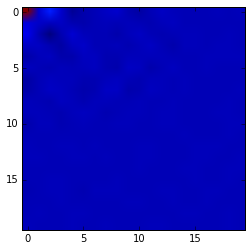

In [265]:
plt.imshow(imgf[:20, :20])
plt.show()

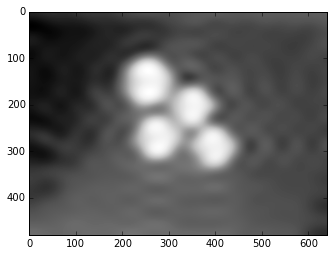

In [268]:
imgf[:, 100:] = 0
imgf[100:, :] = 0

img = idct(idct(imgf.T).T)

plt.imshow(img, cmap="Greys")
plt.show()

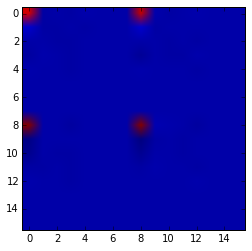

In [250]:
blokSize = 8
img = imread('images/20121021_160926.jpg')
imgFB = np.zeros((h,w), np.float)
for j in range(0, w-blokSize, blokSize):
    for i in range(0, h-blokSize, blokSize):
        try:
            imgB = img[i:i+blokSize, j:j+blokSize, colorB]
            imgB = imgB/255.
            imgf = dct(dct(imgB, axis=0), axis=1)
            imgf[:, 5:] = 0
            imgf[5:, :] = 0
            imgFB[i:i+blokSize,j:j+blokSize] = imgf
        except:
            pass

plt.imshow(imgFB[:2*blokSize, :2*blokSize])
plt.show()

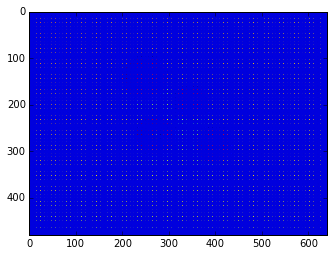

In [251]:
plt.imshow(imgFB)
plt.show()

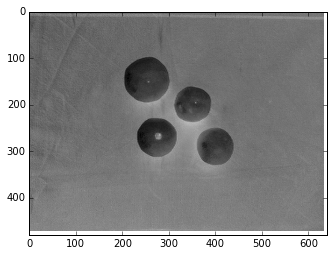

In [252]:
imgIFB = np.zeros((h,w), np.float)
for j in range(0, w, blokSize):
    for i in range(0, h, blokSize):
        try:
            imgB = imgFB[i:i+blokSize,j:j+blokSize]
            imgf = idct(idct(imgB.T).T)            
            imgIFB[i:i+blokSize, j:j+blokSize] = imgf
        except:
            pass
        
plt.imshow(imgIFB, cmap="Greys")
plt.show()